In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [2]:
# download the dataset and segmentation
iris = datasets.load_iris()
X = iris.data
Y = iris.target
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=1)

In [3]:
# standardization
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [4]:
#build model and predict
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
y_predict

In [5]:
#get the result
accracy = clf.score(x_test, y_test)
accracy

0.9666666666666667

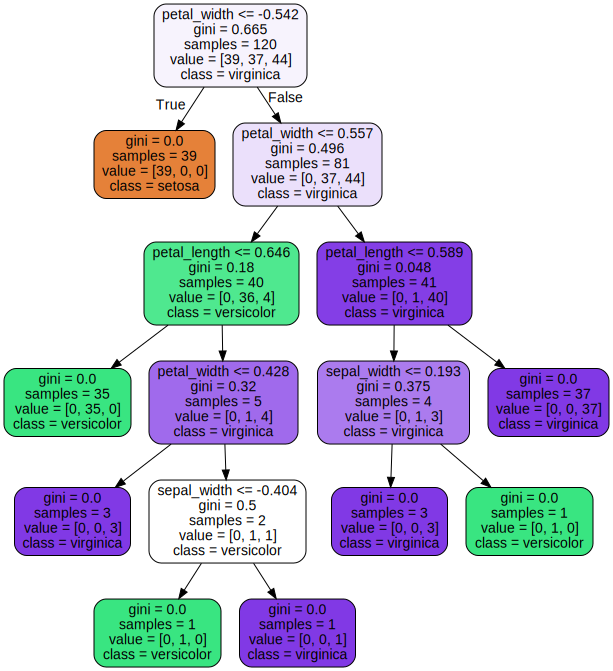

In [6]:
#draw decisiontree
import graphviz
fn = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
cn = iris.target_names
decisiontree = tree.export_graphviz(clf, feature_names = fn, class_names = cn, filled = True, rounded = True)
draw = graphviz.Source(decisiontree)
draw

In [7]:
#cross validation 
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, Y, scoring='accuracy', cv = 10)
print(scores, np.mean(scores), np.var(scores))

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ] 0.9533333333333334 0.0018222222222222212


<Figure size 432x288 with 0 Axes>

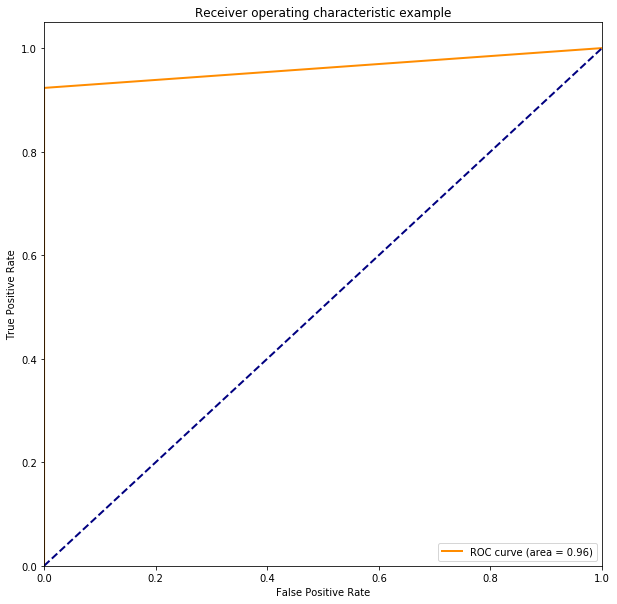

In [11]:
#ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test = label_binarize(y_test, classes=[0,1,2])
y_score = clf.predict_proba(x_test)

fpr, tpr, threshold = roc_curve(y_test[:,1], y_score[:, 1])
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

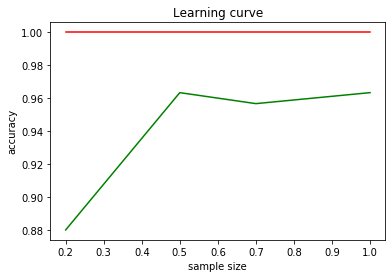

In [16]:
# draw learning curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
sg = np.array([0.2, 0.5, 0.7, 1])
train_size, train_scores,validation_scores = learning_curve(clf, X, Y, train_sizes =sg, cv=cv)
plt.figure()
plt.plot(sg,np.average(train_scores, axis = 1), color = 'r')
plt.plot(sg, np.average(validation_scores, axis = 1), color = 'g')
plt.title('Learning curve')
plt.xlabel('sample size')
plt.ylabel('accuracy')
plt.show()

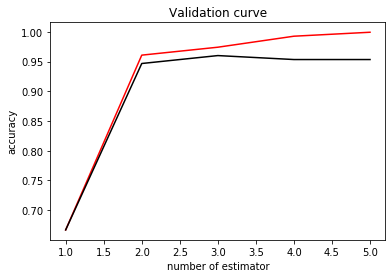

In [19]:
# draw validation curve
from sklearn.model_selection import validation_curve

param_range = [1, 2, 3, 4, 5]
train_scores, validation_scores = validation_curve(DecisionTreeClassifier(random_state=1),X,Y,param_name="max_depth",param_range=param_range,cv=10,scoring="accuracy",n_jobs=1)
plt.figure()
plt.plot(param_range, np.average(train_scores,axis = 1),color = 'r')
plt.plot(param_range,np.average(validation_scores,axis = 1),color = 'g')
plt.title('Validation curve')
plt.xlabel('number of estimator')
plt.ylabel('accuracy')
plt.show()